In [13]:
%reload_ext autoreload
%autoreload 2

In [14]:
import autorootcwd
import os
import json
import pandas as pd

In [15]:
DIR = 'results/pitch_shifts'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    with open(f'{DIR}/{experiment}/metadata.json') as f:
        args = json.load(f)
    args = args['args']
    if args['cqt_pitch_shift'] and args['audio_pitch_shift']:
        shift_type = 'cqt+audio'
    elif args['cqt_pitch_shift']:
        shift_type = 'cqt'
    elif args['audio_pitch_shift']:
        shift_type = 'audio'
    else:
        raise ValueError(f'Neither cqt nor audio pitch shift found in {experiment}')
    
    shift_prob = args['aug_shift_prob']

    with open(f'{DIR}/{experiment}/val_metrics.json') as f:
        data = json.load(f)
    rows.append({
        'shift_type': shift_type,
        'shift_prob': shift_prob,
        'accuracy': data['mean']['acc'],
        'root': data['mean']['root'],
        'majmin': data['mean']['majmin'],
        'third': data['mean']['third'],
        'seventh': data['mean']['seventh'],
        'mirex': data['mean']['mirex'],
        'class_wise_acc_mean': data['class_wise']['acc']['mean'],
        'class_wise_acc_median': data['class_wise']['acc']['median'],
    })


df = pd.DataFrame(rows)

In [16]:
df.sort_values(by=['shift_type', 'shift_prob'], inplace=True)
df

,shift_type,shift_prob,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
29,audio,0.0,60.197447,79.208948,76.635455,76.122973,62.264655,78.809467,23.882967,10.457683
24,audio,0.1,60.721644,79.487212,76.669018,76.240654,62.806722,79.816613,25.016140,16.584433
9,audio,0.2,61.138496,79.721220,76.884965,76.429253,63.188275,80.209756,26.725534,22.361848
13,audio,0.3,62.023184,80.445942,77.875797,77.449881,64.003677,80.237981,28.468596,24.802905
14,audio,0.4,62.342246,80.618739,77.694070,77.296682,64.339416,80.681145,28.086336,19.780323
8,audio,0.5,62.315058,80.894021,78.018189,77.609866,64.349624,80.607835,28.433391,22.361841
25,audio,0.6,62.418906,80.928738,77.957246,77.582195,64.404537,80.620014,29.189505,22.337257
28,audio,0.7,62.687383,80.859463,78.221780,77.844859,64.582348,80.969613,29.300520,26.046222
23,audio,0.8,62.697943,81.011736,77.987448,77.556494,64.703545,80.867849,29.397450,29.229727
30,audio,0.9,62.629766,80.933821,78.001698,77.611562,64.642952,80.717509,29.393392,28.100474


In [144]:
# Set cqt values of pitch_shift to be capitalized
def capitalize_cqt(shift_type):
    return shift_type.upper() if shift_type == 'Cqt' else shift_type

df['shift_type'] = df['shift_type'].apply(capitalize_cqt)

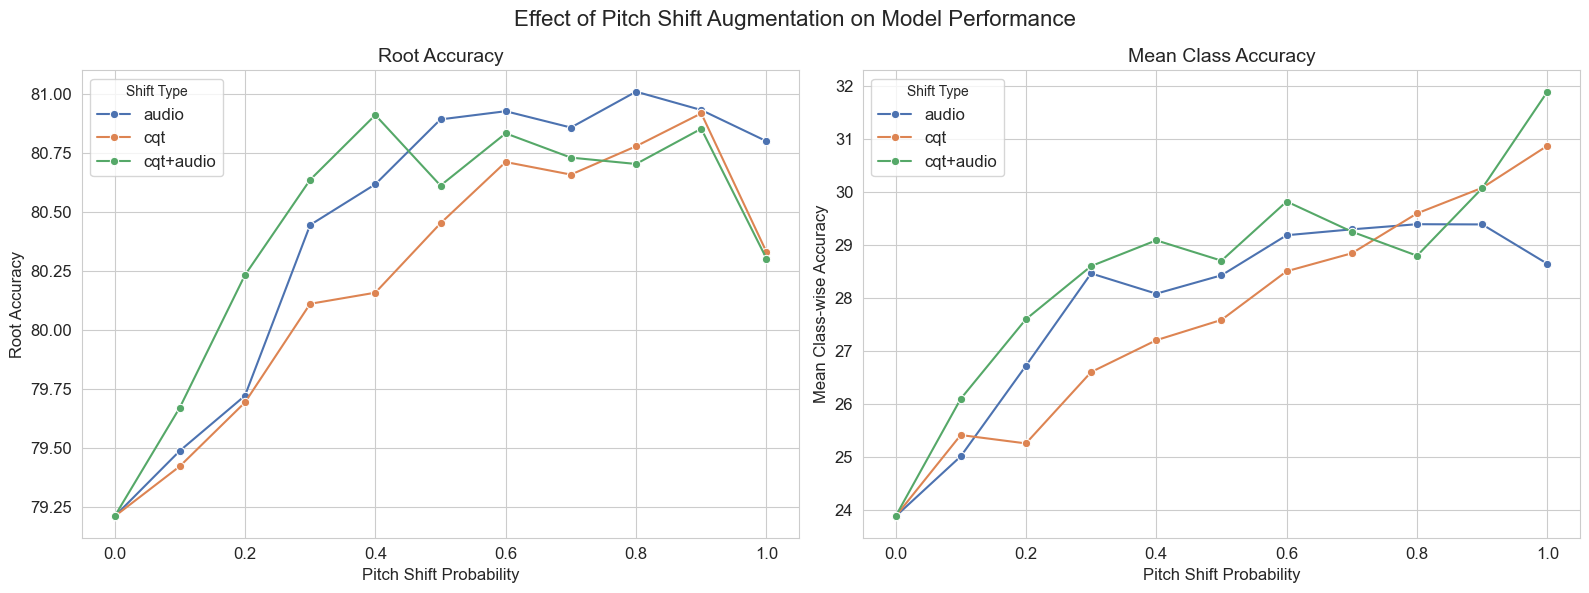

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Plot the 'root' metric on the left subplot
sns.lineplot(data=df, x='shift_prob', y='root', hue='shift_type', marker='o', ax=ax1)
ax1.set_title('Root Accuracy vs Pitch Shift Probability')
ax1.set_xlabel('Pitch Shift Probability')
ax1.set_ylabel('Root Accuracy')
ax1.legend(title='Shift Type')

# Plot the 'class_wise_acc_mean' metric on the right subplot
sns.lineplot(data=df, x='shift_prob', y='class_wise_acc_mean', hue='shift_type', marker='o', ax=ax2)
ax2.set_title('Class-wise Mean Accuracy vs Pitch Shift Probability')
ax2.set_xlabel('Pitch Shift Probability')
ax2.set_ylabel('Class-wise Mean Accuracy')
ax2.legend(title='Shift Type')

# Increase font size for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), fontsize=12)
plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=12)
plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=12)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=12)

# axis titles
ax1.set_title('Root Accuracy', fontsize=14)
ax1.set_xlabel('Pitch Shift Probability', fontsize=12)
ax1.set_ylabel('Root Accuracy', fontsize=12)
ax2.set_title('Mean Class Accuracy', fontsize=14)
ax2.set_xlabel('Pitch Shift Probability', fontsize=12)
ax2.set_ylabel('Mean Class-wise Accuracy', fontsize=12)
# Increase legend font size
ax1.legend(title='Shift Type', fontsize=12)
ax2.legend(title='Shift Type', fontsize=12)

# Title larger 
plt.suptitle('Effect of Pitch Shift Augmentation on Model Performance', fontsize=16)
# Adjust layout to prevent overlap
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig('thesis/figures/pitch_shift_analysis.png', dpi=200, bbox_inches='tight')
plt.show()

In [119]:
x = torch.Tensor([[0.0, 0.5, 1.0], [0.0, 0.5, 1.0]])
x, x.shape

(tensor([[0.0000, 0.5000, 1.0000],
         [0.0000, 0.5000, 1.0000]]),
 torch.Size([2, 3]))